<a href="https://colab.research.google.com/github/asparmar14/Earthquake-prediction-model/blob/main/earthquake_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## "Earthquake Magnitude Classification and Model Comparison with Hyperparameter Tuning and Feature Engineering"

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_India= pd.read_csv('/content/eq_India.csv')
df_India.sample(4)

,index,time,latitude,longitude,depth,mag,place
1155,4039,2013-08-17T14:41:18.980Z,11.1830,93.3084,62.42,4.6,"81 km SE of Port Blair, India"
247,667,2021-07-05T17:06:55.336Z,28.9016,76.8390,10.00,3.9,"7 km WNW of Kharkhauda, India"
858,2635,2016-01-15T19:24:52.540Z,11.7568,92.8636,50.41,4.3,"16 km NE of Port Blair, India"
905,2871,2015-08-13T02:00:31.650Z,30.3746,94.8333,38.31,4.7,"209 km NNE of Shi Yomi, India"


In [31]:
df_India['mag'].describe()

,mag
count,1337.000000
mean,4.492072
std,0.363631
min,3.200000
25%,4.200000
50%,4.500000
75%,4.700000
max,6.700000


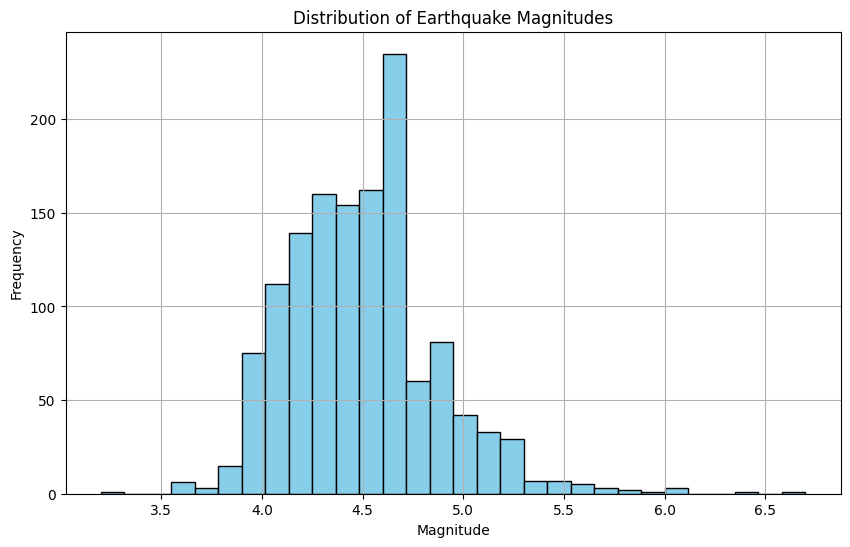

In [32]:
import matplotlib.pyplot as plt

# Plot histogram for 'mag' column
plt.figure(figsize=(10, 6))
plt.hist(df_India['mag'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

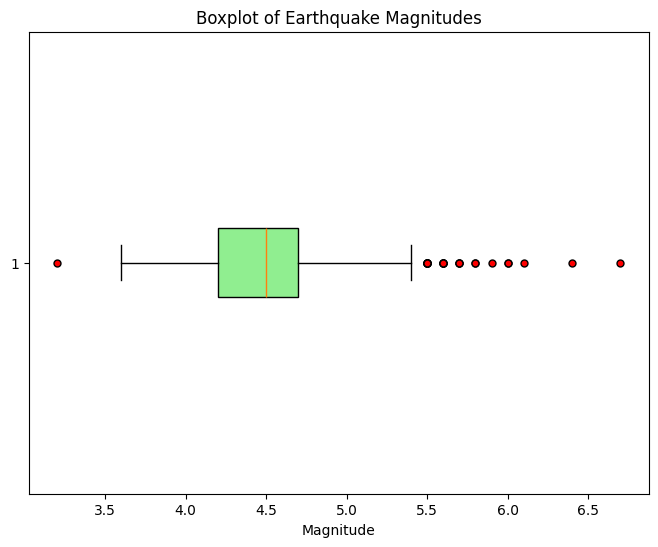

In [33]:
# Boxplot for 'mag' column
plt.figure(figsize=(8, 6))
plt.boxplot(df_India['mag'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
plt.title('Boxplot of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.show()

In [34]:
# Step 1: Feature Engineering
# Classify magnitude into categories
def classify_magnitude(mag):
    if mag >= 8.0:
        return 'Mega(≥8.0)'
    elif mag >= 7.0:
        return 'Great(7.0-7.9)'
    elif mag >= 6.0:
        return 'Major(6.0-6.9)'
    elif mag >= 5.0:
        return 'Strong(5.0-5.9)'
    elif mag >= 4.0:
        return 'Moderate(4.0-4.9)'
    elif mag >= 3.0:
        return 'Light(3.0-3.9)'
    else:
        return 'Micro(<3.0)'

df_India['magnitude_category'] = df_India['mag'].apply(classify_magnitude)

# Extract location and country information
df_India['location'] = df_India['place'].str.split(',').str.get(0)
df_India['Country'] = df_India['place'].str.split(',').str.get(1)
df_India.drop(columns='place', inplace=True)

# Adding new features: Distance from the equator and prime meridian
df_India['distance_from_equator'] = df_India['latitude'].abs()
df_India['distance_from_meridian'] = df_India['longitude'].abs()

In [35]:
df_India.columns

Index(['index', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magnitude_category', 'location', 'Country', 'distance_from_equator',
       'distance_from_meridian'],
      dtype='object')

In [36]:
# Prepare data for classification
X = df_India[['latitude', 'longitude', 'depth', 'distance_from_equator', 'distance_from_meridian']]
y = df_India['magnitude_category']

In [37]:
# Step 2: Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
# Step 3: Hyperparameter Tuning
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [40]:
# Step 4: Evaluate the Best Model
y_pred = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                    precision    recall  f1-score   support

   Light(3.0-3.9)       1.00      0.50      0.67         2
   Major(6.0-6.9)       0.00      0.00      0.00         1
Moderate(4.0-4.9)       0.90      1.00      0.94       239
  Strong(5.0-5.9)       0.00      0.00      0.00        26

         accuracy                           0.90       268
        macro avg       0.47      0.38      0.40       268
     weighted avg       0.81      0.90      0.85       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


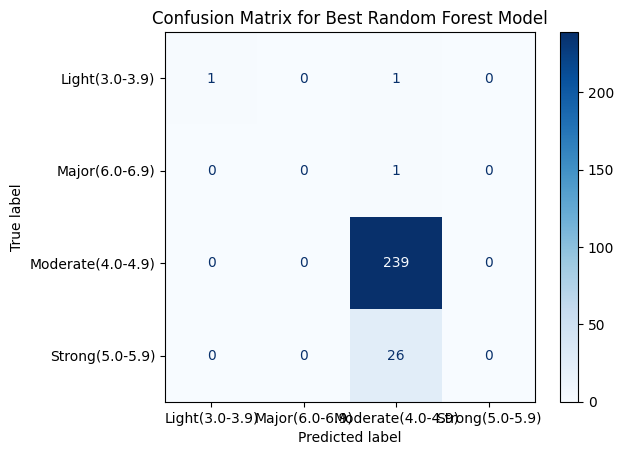

In [41]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()

In [42]:
# Step 5: Compare Models with Visualization
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [43]:
# Define models
models = {
    "Random Forest": best_rf,
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

In [44]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print("-" * 20)

Model: Random Forest
  Accuracy: 0.8955
  Precision: 0.8057
  Recall: 0.8955
  F1 Score: 0.8474
--------------------
Model: Logistic Regression
  Accuracy: 0.8918
  Precision: 0.7953
  Recall: 0.8918
  F1 Score: 0.8408
--------------------
Model: Decision Tree
  Accuracy: 0.7836
  Precision: 0.8175
  Recall: 0.7836
  F1 Score: 0.7990
--------------------
Model: SVM
  Accuracy: 0.8918
  Precision: 0.7953
  Recall: 0.8918
  F1 Score: 0.8408
--------------------


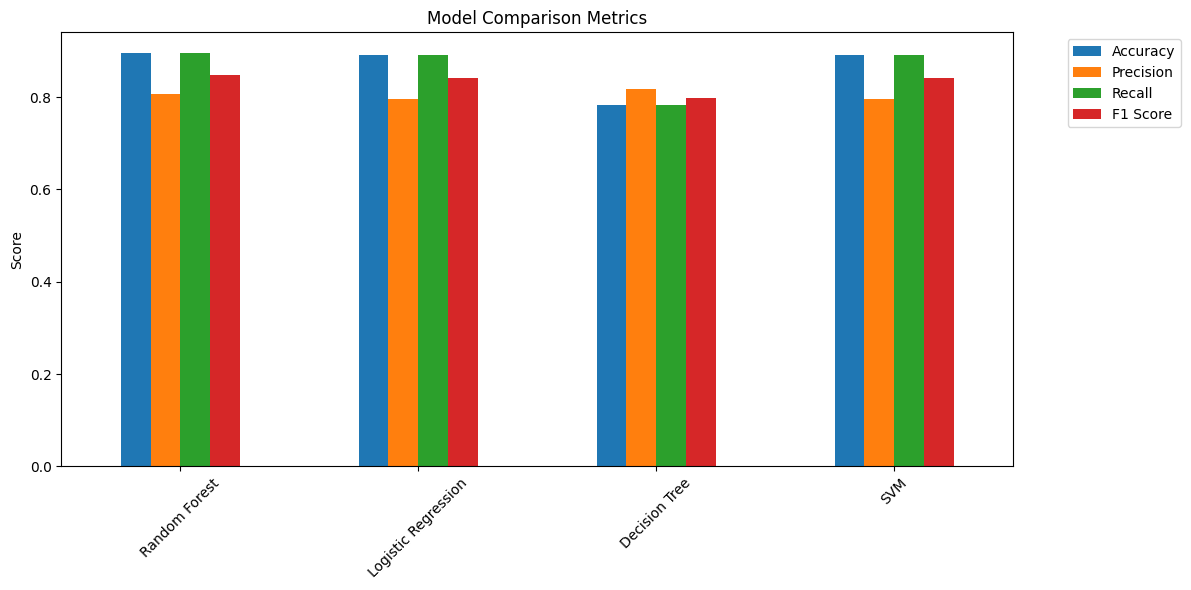

In [46]:
# Visualize Results
metrics_df = pd.DataFrame(results).T  # Convert results to DataFrame
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

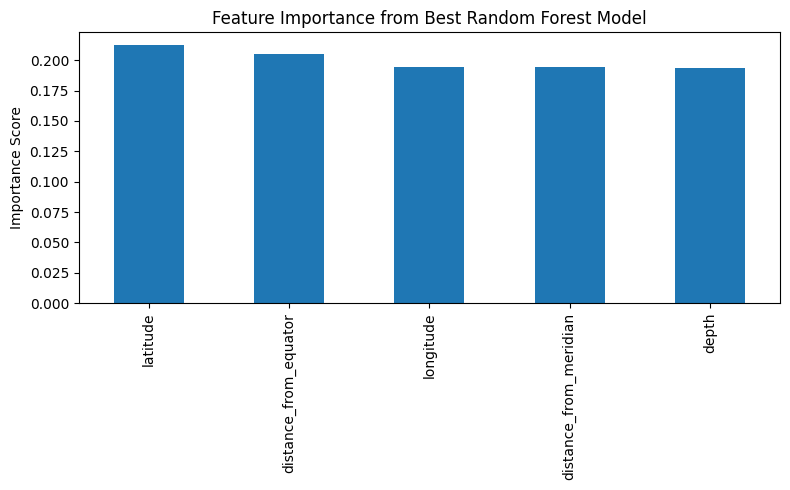

In [47]:
# Feature Importance Visualization for Random Forest
feature_importances = pd.Series(best_rf.feature_importances_, index=['latitude', 'longitude', 'depth', 'distance_from_equator', 'distance_from_meridian'])
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))
plt.title("Feature Importance from Best Random Forest Model")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [48]:
!pip install cartopy

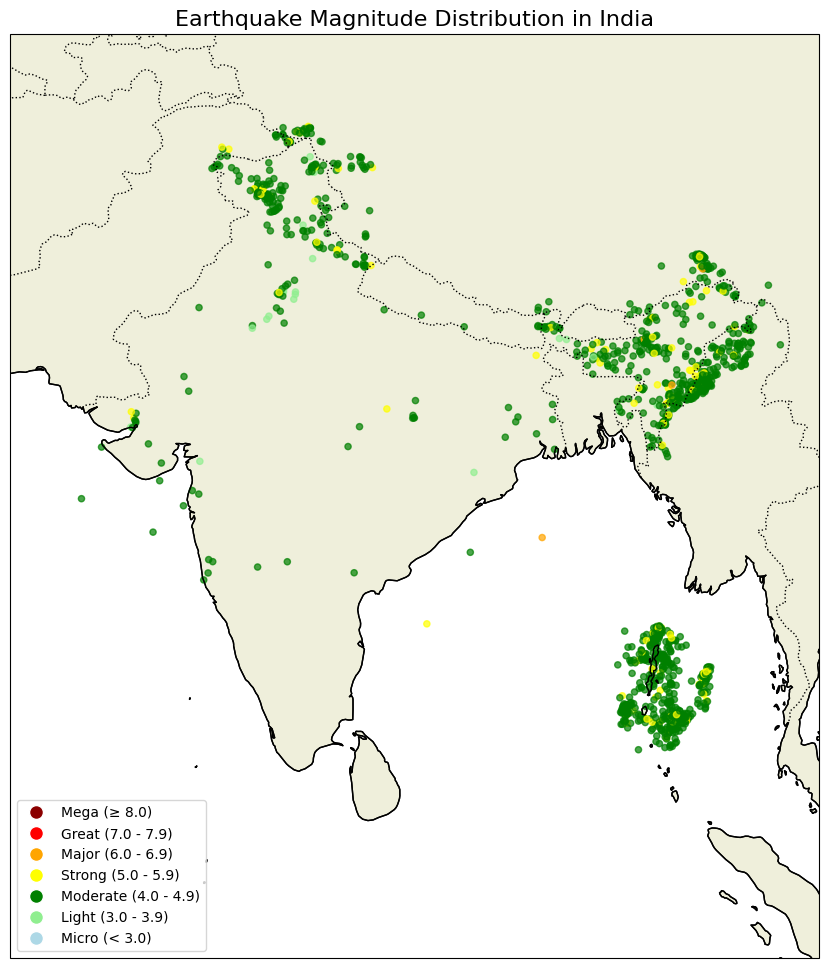

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Modify classification function for categories
def classify_magnitude(mag):
    if mag >= 8.0:
        return 'Mega (≥ 8.0)'
    elif mag >= 7.0:
        return 'Great (7.0 - 7.9)'
    elif mag >= 6.0:
        return 'Major (6.0 - 6.9)'
    elif mag >= 5.0:
        return 'Strong (5.0 - 5.9)'
    elif mag >= 4.0:
        return 'Moderate (4.0 - 4.9)'
    elif mag >= 3.0:
        return 'Light (3.0 - 3.9)'
    else:
        return 'Micro (< 3.0)'

# Apply classification to the dataframe
df_India['magnitude_category'] = df_India['mag'].apply(classify_magnitude)

# Create a map with Cartopy
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_extent([65, 100, 0, 40], crs=ccrs.PlateCarree())

# Color coding for different magnitude categories
colors = df_India['magnitude_category'].map({
    'Mega (≥ 8.0)': 'darkred',
    'Great (7.0 - 7.9)': 'red',
    'Major (6.0 - 6.9)': 'orange',
    'Strong (5.0 - 5.9)': 'yellow',
    'Moderate (4.0 - 4.9)': 'green',
    'Light (3.0 - 3.9)': 'lightgreen',
    'Micro (< 3.0)': 'lightblue'
})

# Plot earthquake points with color coding based on magnitude category
plt.scatter(
    df_India['longitude'],
    df_India['latitude'],
    c=colors,
    s=20,
    transform=ccrs.PlateCarree(),
    alpha=0.7
)

# Add title and legend
plt.title("Earthquake Magnitude Distribution in India", fontsize=16)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markersize=10, label='Mega (≥ 8.0)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Great (7.0 - 7.9)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Major (6.0 - 6.9)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Strong (5.0 - 5.9)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Moderate (4.0 - 4.9)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='Light (3.0 - 3.9)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Micro (< 3.0)'),
], loc='lower left', fontsize=10)

plt.show()

In [55]:
import folium

# Initialize a map centered around India
map_earthquake = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Color coding based on magnitude category
def get_color(category):
    if category == 'Mega (≥ 8.0)':
        return 'darkred'
    elif category == 'Great (7.0 - 7.9)':
        return 'red'
    elif category == 'Major (6.0 - 6.9)':
        return 'orange'
    elif category == 'Strong (5.0 - 5.9)':
        return 'yellow'
    elif category == 'Moderate (4.0 - 4.9)':
        return 'green'
    elif category == 'Light (3.0 - 3.9)':
        return 'lightgreen'
    else:
        return 'lightblue'

# Add points to the map with category-based color
for _, row in df_India.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=get_color(row['magnitude_category']),
        fill=True,
        fill_color=get_color(row['magnitude_category']),
        fill_opacity=0.7,
        tooltip=f"Magnitude: {row['mag']}, Depth: {row['depth']} km",
    ).add_to(map_earthquake)

# Create a custom legend for the map
legend_html = """
     <div style="position: fixed;
                 bottom: 30px; left: 30px; width: 250px; height: 150px;
                 background-color: white; z-index: 9999; font-size: 14px;
                 border:2px solid grey; border-radius: 5px; padding: 10px;">
     <b>Earthquake Magnitude Categories</b><br>
     <i style="background-color: darkred; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Mega (≥ 8.0)<br>
     <i style="background-color: red; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Great (7.0 - 7.9)<br>
     <i style="background-color: orange; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Major (6.0 - 6.9)<br>
     <i style="background-color: yellow; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Strong (5.0 - 5.9)<br>
     <i style="background-color: green; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Moderate (4.0 - 4.9)<br>
     <i style="background-color: lightgreen; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Light (3.0 - 3.9)<br>
     <i style="background-color: lightblue; width: 20px; height: 20px; float: left; margin-right: 10px;"></i> Micro (< 3.0)<br>
     </div>
     """
map_earthquake.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
map_earthquake.save("Earthquake_Map_with_Legend.html")
map_earthquake